In [10]:
import random
import math
import matplotlib.pyplot as plt

This code calaculates the probability of landing on step 25 for each combination of 1 or 2 steps

In [13]:
# Define the cases
cases = [
    (24, 0, 24),
    (22, 1, 23),
    (20, 2, 22),
    (18, 3, 21),
    (16, 4, 20),
    (14, 5, 19),
    (12, 6, 18),
    (10, 7, 17),
    (8, 8, 16),
    (6, 9, 15),
    (4, 10, 14),
    (2, 11, 13),
    (0, 12, 12)
]

# Function to calculate probability
def calculate_probability(n1, n2, total):
    # Calculate the number of ways to rearrange the combination
    ways = math.comb(total, n2)
    # Calculate the probability
    probability = (0.5 ** total) * ways
    return probability

# Calculate and print the probability for each case
for case in cases:
    n1, n2, total = case
    probability = calculate_probability(n1, n2, total)
    print(f"For n1={n1}, n2={n2}, total={total}, the probability is {probability}")


For n1=24, n2=0, total=24, the probability is 5.960464477539063e-08
For n1=22, n2=1, total=23, the probability is 2.7418136596679688e-06
For n1=20, n2=2, total=22, the probability is 5.507469177246094e-05
For n1=18, n2=3, total=21, the probability is 0.0006341934204101562
For n1=16, n2=4, total=20, the probability is 0.004620552062988281
For n1=14, n2=5, total=19, the probability is 0.02217864990234375
For n1=12, n2=6, total=18, the probability is 0.0708160400390625
For n1=10, n2=7, total=17, the probability is 0.14837646484375
For n1=8, n2=8, total=16, the probability is 0.196380615234375
For n1=6, n2=9, total=15, the probability is 0.152740478515625
For n1=4, n2=10, total=14, the probability is 0.06109619140625
For n1=2, n2=11, total=13, the probability is 0.009521484375
For n1=0, n2=12, total=12, the probability is 0.000244140625


This code adds up all of the individual probabilities to get the total P(25)

In [14]:
total_probability = 0

for case in cases:
    n1, n2, total = case
    probability = calculate_probability(n1, n2, total)
    total_probability += probability

print(f"The total probability of landing on 25 is {total_probability}")


The total probability of landing on 25 is 0.6666666865348816


This code uses a different method - the formula - in order to check my answer

In [15]:
p = [0] * 26
p[1] = 1
for i in range(2, 26):
    p[i] = 1 - 0.5 * p[i-1]
print(p[25])


0.6666666865348816


In this code, the first part calculates the theoretical probabilities of landing on each step from 1 to 50 using the formula $P(n) = 1 - 0.5 \times P(n-1)$. It also simulates the game 1000 times, keeps remembering each step landed on. It then plots both.

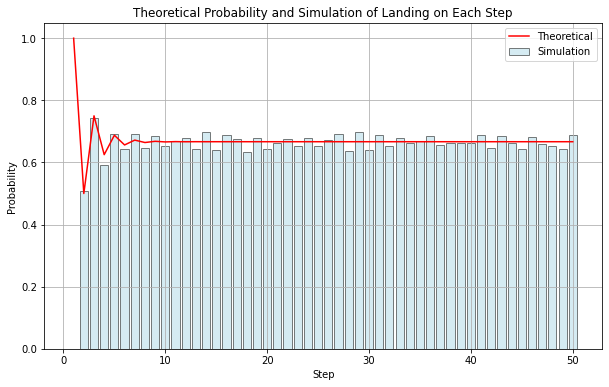

In [49]:
# Calculate the theoretical probabilities
p = [0] * 51
p[1] = 1
for i in range(2, 51):
    p[i] = 1 - 0.5 * p[i-1]

# Simulate the game
num_runs = 1000
results = [0] * 51
for _ in range(num_runs):
    step = 1
    for _ in range(51):
        step += np.random.choice([1, 2])
        if step <= 50:
            results[step] += 1
results = [r / num_runs for r in results]

# Plot the histogram and theoretical probabilities 
plt.figure(figsize=(10, 6))
plt.bar(range(1, 51), results[1:], color='lightblue', edgecolor='black', alpha=0.5, label='Simulation')
plt.plot(range(1, 51), p[1:], 'r-', label='Theoretical')
plt.title('Theoretical Probability and Simulation of Landing on Each Step')
plt.xlabel('Step')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.show()


This is a function that simulates the process and plots the final step after a certain number of throws

In [51]:
def simulate_and_plot(num_runs, num_throws, start, color='lightblue'):
    results = [0] * num_runs

    for i in range(num_runs):
        step = 1
        for _ in range(num_throws):
            step += random.choice([1, 2])
            results[i] = step

    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(results, bins=range(start, start+50), color=color, edgecolor='black')
    plt.title('Distribution of Final Steps after {} Throws'.format(num_throws))
    plt.xlabel('Step')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

This uses the function to calculate the final step distributon after 24, 50 and 16 throws

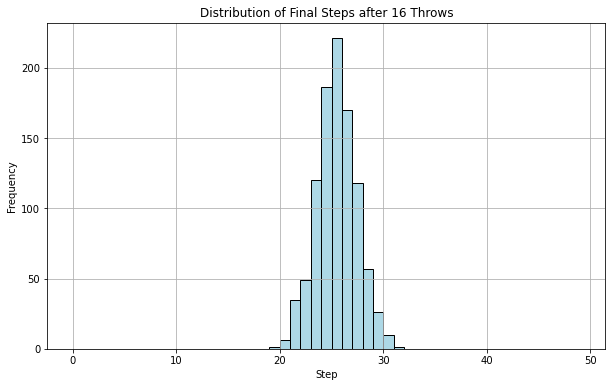

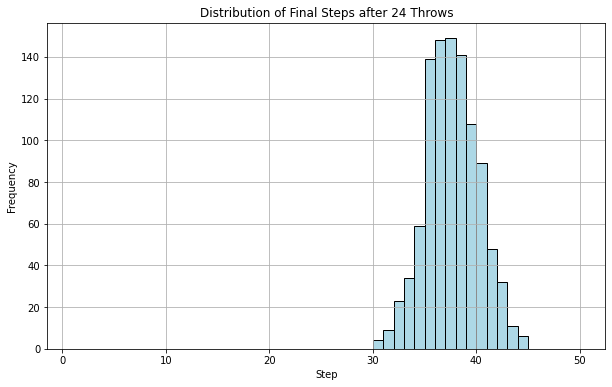

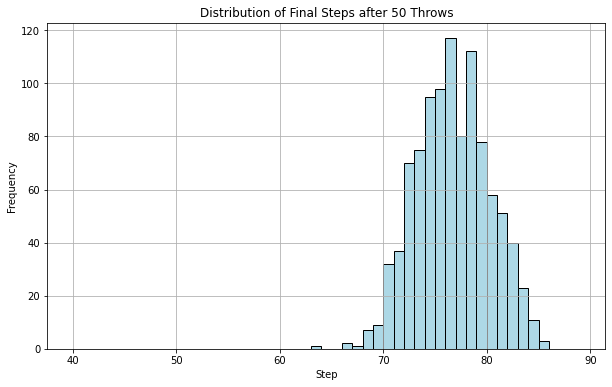

In [52]:
simulate_and_plot(num_runs=1000, num_throws=16, start=0)
simulate_and_plot(num_runs=1000, num_throws=24, start=1)
simulate_and_plot(num_runs=1000, num_throws=50, start=40)

This code plots the distribution of the number of throws that make the final step = 25

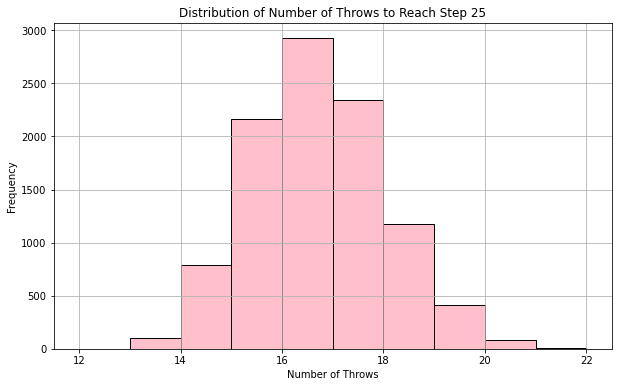

In [53]:
num_simulations = 10000

num_throws = []

for _ in range(num_simulations):
    step = 1
    throws = 0
    while step < 25:
        step += random.choice([1, 2])
        throws += 1
    num_throws.append(throws)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(num_throws, bins=range(min(num_throws), max(num_throws) + 1),color='pink', edgecolor='black')
plt.title('Distribution of Number of Throws to Reach Step 25')
plt.xlabel('Number of Throws')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
